In [80]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [81]:
def scaleFeatures(vector):
    max_val = max(vector)
    min_val = min(vector)
    for i in range(len(vector)):
        vector[i] = (vector[i]-min_val)/(max_val-min_val)
    return vector

In [93]:
def createDataSets():
    # Specify the path to your CSV file
    csv_file_path = 'heart.csv'

    # Initialize lists to store the labels, row vector, and the remaining float values
    Features_names = []
    Y_train = []
    X_train = []

    # Open the CSV file
    with open(csv_file_path, mode='r') as file:
        # Create a CSV reader object
        csv_reader = csv.reader(file)
        
        # Read the first row as labels
        Features_names = next(csv_reader)
        
        # Iterate over the remaining rows in the CSV file
        for row in csv_reader:
            Y_train.append(float(row[-1]))  # Append the first column value to the row vector and convert to float
            trainEg = [float(value) for value in row[0:-1]]  # Convert the remaining values to floats
            X_train.append(trainEg)

    # Convert lists to numpy arrays
    Y_train = np.array(Y_train)
    X_train = np.array(X_train)
    # col 1 4 5 8 
    col1=[]
    col4=[]
    col5=[]
    col8=[]
    for i in range(len(X_train)):
        col1.append(X_train[i][0])
        col4.append(X_train[i][3])
        col5.append(X_train[i][4])
        col8.append(X_train[i][7])
    col1 = np.array(col1)
    col1 = scaleFeatures(col1)
    col4 = np.array(col4)
    col4 = scaleFeatures(col4)
    col5 = np.array(col5)
    col5 = scaleFeatures(col5)
    col8 = np.array(col8)
    col8 = scaleFeatures(col8)
    for i in range(len(X_train)):
        X_train[i][0] = col1[i]
        X_train[i][3] = col4[i]
        X_train[i][4] = col5[i]
        X_train[i][7] = col8[i]

    return Y_train,X_train


In [101]:
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g

In [107]:
def predict(X_pred, w,b):
    z = np.dot(X_pred,w) +b
    pred=sigmoid(z)
    print(pred)
    if pred > 0.5:
        return 1
    else:
        return 0

In [108]:
def cost(w,b,X,y):
    Cost =0
    m = len(y)
    for i in range(m):
        z_i = np.dot(w,X[i])+b
        f_wb_i = sigmoid(z_i)
        Cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
    Cost/=m
    return Cost



In [119]:
def gradientDescent(X_train, Y_train, w,b):
    m,n = X_train.shape
    dw = np.zeros(w.shape)
    db = 0.0
    for i in range(m):
        z = np.dot(w, X_train[i]) + b
        f= sigmoid(z)
        for j in range(n):
            dw[j] = (f - Y_train[i])* X_train[i][j]
        dw_i = (f - Y_train[i]) * X_train[i]
        db_i = (f - Y_train[i])
        dw += dw_i
        db += db_i
    dw /= m
    db /= m
    return dw, db

In [127]:
def optimize(num_iters, X_train, Y_train, learning_rate):
    n=X_train.shape[1]
    w = np.ones(n, dtype=float)
    b = 1.0
    iterations =[]
    costs =[]
    for k in range(num_iters):
        dw, db = gradientDescent(X_train, Y_train, w, b)
        w -= learning_rate * dw
        b -= learning_rate * db
        if (k % 100 == 0):
            iterations.append(k)
            thiscost = cost(w, b, X_train, Y_train)
            costs.append(thiscost)

            print(f"Iteration {k}: Cost {thiscost}")
    return w, b , iterations, costs

In [125]:
def model():
    Y_train, X_train = createDataSets()
    w, b, iterations, costs = optimize(1000,X_train, Y_train, 0.1)
    plt.plot(iterations,costs)
    plt.show()
    X_pred = [0.39583333, 0, 2, 0.33962264, 0.34018265, 0,1, 0.51908397, 0, 0.2, 2, 0,2]
    print(predict(X_pred,w,b))
    

Iteration 0: Cost 5.299834918678642
Iteration 100: Cost 2.9950036748203863
Iteration 200: Cost 1.602001980330835
Iteration 300: Cost 1.4386384512301351
Iteration 400: Cost 1.4289531804003517
Iteration 500: Cost 1.4264493721356128
Iteration 600: Cost 1.424184467887377
Iteration 700: Cost 1.4219147340729887
Iteration 800: Cost 1.4196461592619303
Iteration 900: Cost 1.4173828377093902


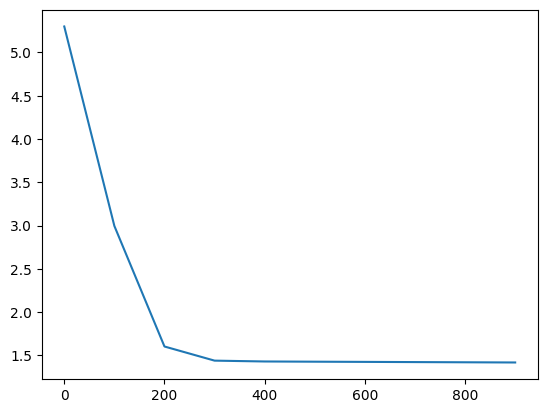

0.31813427415736123
0


In [128]:
model()